In [1]:
import tensorflow as tf
import numpy as np
import IPython.display as ipd
import urllib.request

C:\Users\alant\anaconda3\envs\tf1.12\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\alant\anaconda3\envs\tf1.12\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\alant\anaconda3\envs\tf1.12\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\alant\anaconda3\envs\tf1.12\lib\site-packages\tensorflow\pyth

# fiwGAN and ciwGAN Demo

This notebook is a demo for Categorical InfoWaveGAN (ciwGAN) and Featural InfoWaveGAN (fiwGAN), as proposed  in [Beguš 2021](https://www.sciencedirect.com/science/article/pii/S0893608021001052). In short, these are unsupervised models trained on speech data that are able discover underlying relationships in speech and generate novel utterances.  These particular models are each trained on 8 words from the [TIMIT corpus](https://catalog.ldc.upenn.edu/LDC93s1), specifically the words *dark*, *greasy*, *oily*, *rag*, *year*, *wash*, and *water*. We will give a brief overview of the models and how they encode information, and showcase their generative ability. 


If you would like to train your own models, please check out the [Deep Phonology Tool](https://github.com/gbegus/DeepPhonologyTool)!

# Model Overview

![title](assets/images/fiwgan.png)

fiwGAN/ciwGAN are each composed of three networks: the Generator, the Discriminator, and the Q-network. 

#### Original GAN setup: the Generator and Discriminator

fiwGAN/ciwGAN are built upon the basic framework of [WaveGAN](https://arxiv.org/abs/1802.04208). Two separate networks, the Generator and Discriminator, compete in a zero-sum game. The generator $G(z)$ takes a latent space $z$ and transforms that into audio data $G(z)$. The discriminator $D(x, G(z))$ takes real audio $x$ or generated audio $G(z)$, and tries to assign a "realness score".

During the training process, the Discriminator is trained to approximate this realness score as accurately as possible (assign low scores for generated examples and high scores for real data). By contrast, the Generator is trained to make it as hard 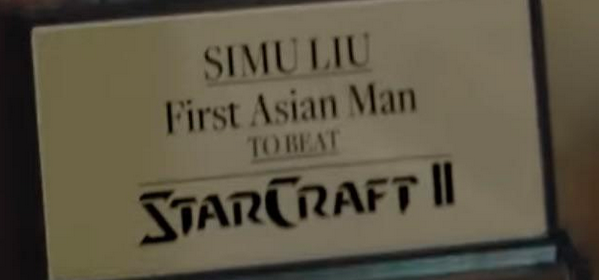for the Discriminator to approximate realness. If all goes well, by the end of training, the Generator should have learned to produce outputs that are nearly indistinguishable from the training data.

#### Inspiration from InfoGAN: the Q-network

# Generation Demo


In [ ]:
ciw_url = 'https://linguistics.berkeley.edu/bsclab/checkpoints/8word_fiw/{}'
chkpt = 'model.ckpt-58781'
ciw_data = chkpt + '.data-00000-of-00001'
ciw_index = chkpt + '.index'

saver = tf.train.import_meta_graph('./checkpoints/infer.meta')
graph = tf.get_default_graph()
sess = tf.InteractiveSession()
urllib.request.urlretrieve(ciw_url.format(ciw_data), ciw_data) #TODO: Add Progress Bar
urllib.request.urlretrieve(ciw_url.format(ciw_index), ciw_index) #TODO: Add Progress Bar
saver.restore(sess, chkpt)

z_in = graph.get_tensor_by_name('z:0')
G_z = graph.get_tensor_by_name('G_z:0')[0, :, 0]

C:\Users\alant\anaconda3\envs\tf1.12\lib\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [3]:
z = np.random.uniform(-1, 1, (3, 100))
output = sess.run(G_z, {z_in: z})
print(z)

NameError: name 'np' is not defined

In [4]:
ipd.Audio(output, rate=16000)